# Task 2: Noise Removal Using Machine Learning
This notebook demonstrates noise removal from MNIST images using a **Denoising Autoencoder** built with scikit-learn's MLPRegressor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the data

In [2]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
images = np.asarray(data.data)
# Normalize to [0, 1]
images = images / 255.0

print(f"Dataset shape: {images.shape}")
print(f"Pixel value range: [{images.min():.2f}, {images.max():.2f}]")

Dataset shape: (70000, 784)
Pixel value range: [0.00, 1.00]


## Add noise and train the model to reconstruct the clean image

We add **Gaussian noise** to the images and train a denoising autoencoder to recover the originals.

Impact on Images: When applied to images, Gaussian noise results in a blurring effect where pixel values are randomly altered based on the Gaussian distribution. It's often used in image processing as a model for random errors or variations in sensor data.

Noisy images shape: (70000, 784)


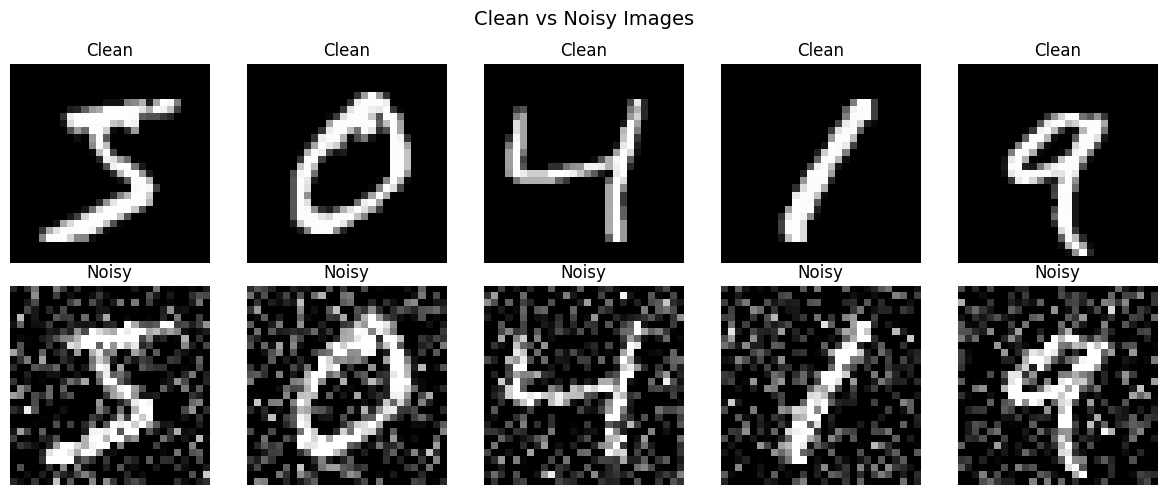

In [7]:
# Add Gaussian noise
noise_factor = 0.3
np.random.seed(42)
noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape) #the core line for adding Gaussian noise:

# Clip to valid range [0, 1]
noisy_images = np.clip(noisy_images, 0.0, 1.0)

print(f"Noisy images shape: {noisy_images.shape}")

# Visualize some noisy vs clean images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
    axes[0, i].imshow(images[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title('Clean')
    axes[0, i].axis('off')
    axes[1, i].imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')
plt.suptitle('Clean vs Noisy Images', fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
# Preprocess: Split into train and test sets
X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
    noisy_images, images, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train_noisy.shape[0]}")
print(f"Test samples: {X_test_noisy.shape[0]}")

Training samples: 56000
Test samples: 14000


## Load MNIST Labels




In [16]:
labels = data.target.astype(int)

print(f"Labels shape: {labels.shape}")
print(f"Sample labels: {labels[:10]}")

Labels shape: (70000,)
Sample labels: [5 0 4 1 9 2 1 3 1 4]


## Prepare Data for Classification

Split the `noisy_images` and their corresponding numerical labels into training and testing sets (`y_train`, `y_test`) to prepare the data for training a classification model.


In [17]:
y_train, y_test = train_test_split(labels, test_size=0.2, random_state=42)

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Sample y_train: {y_train[:5]}")
print(f"Sample y_test: {y_test[:5]}")

y_train shape: (56000,)
y_test shape: (14000,)
Sample y_train: [5 4 8 0 2]
Sample y_test: [8 4 8 7 7]


## Train a Classic ML Classifier on Noisy Data


Implement and train a classic machine learning classifier `RandomForestClassifier` using the `X_train_noisy` (noisy training images) and `y_train` (corresponding labels). The model will learn to classify digits from noisy input.


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train_noisy, y_train)

print("RandomForestClassifier trained successfully.")

RandomForestClassifier trained successfully.


## Evaluate Classifier Generalization

Evaluate the performance by calculating  accuracy on both the `X_test_clean` (clean test images) and `X_test_noisy` (noisy test images). This will show how well the model generalizes from noisy training data to clean data, and its robustness to noise in the test set.


In [19]:
from sklearn.metrics import accuracy_score

# 1. Make predictions on X_test_clean
y_pred_clean = classifier.predict(X_test_clean)

# 2. Calculate and print accuracy on clean test set
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print(f"Accuracy on clean test set: {accuracy_clean:.4f}")

# 3. Make predictions on X_test_noisy
y_pred_noisy = classifier.predict(X_test_noisy)

# 4. Calculate and print accuracy on noisy test set
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
print(f"Accuracy on noisy test set: {accuracy_noisy:.4f}")

Accuracy on clean test set: 0.8778
Accuracy on noisy test set: 0.7931


## Visualize Classifier Predictions



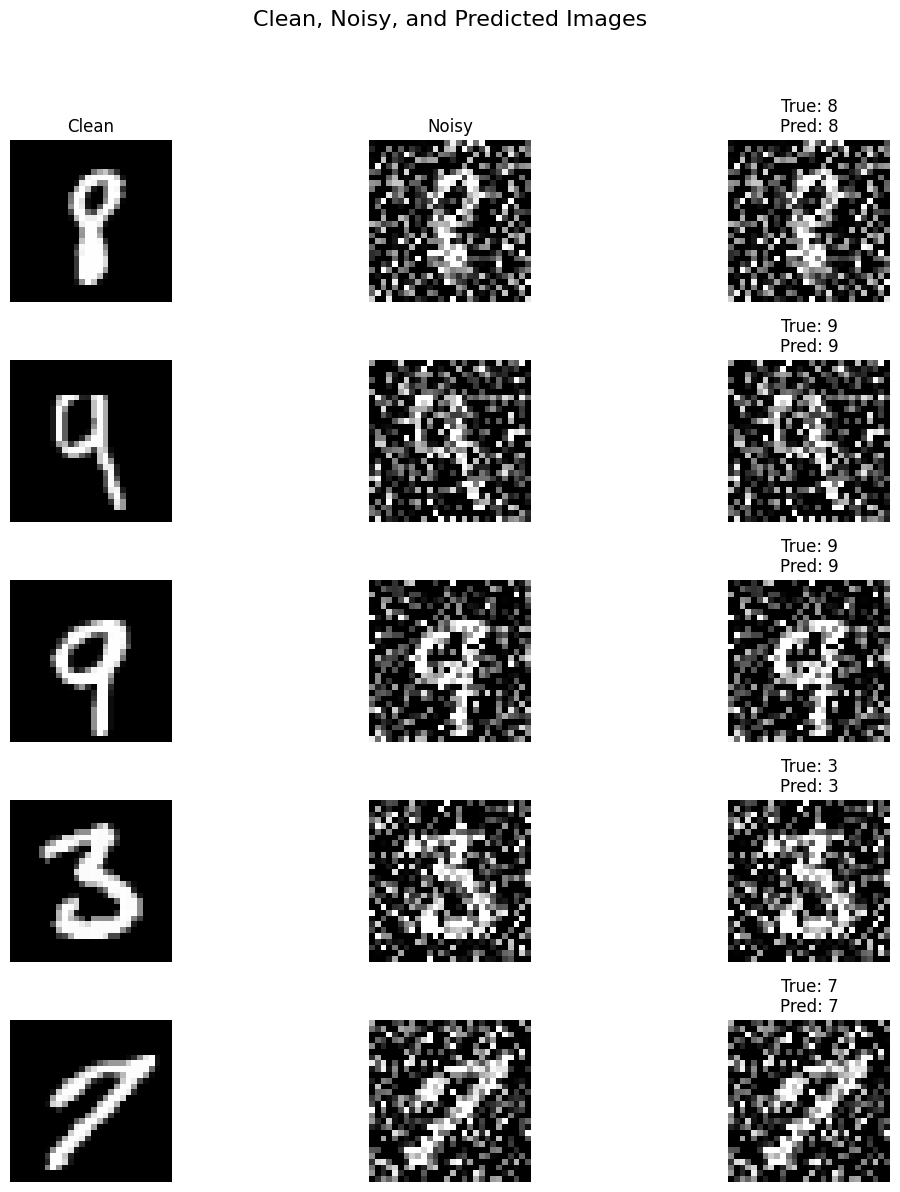

In [21]:
n_images_to_show = 5 # Reduced to 5 for better readability
random_indices = np.random.choice(len(X_test_noisy), n_images_to_show, replace=False)

fig, axes = plt.subplots(n_images_to_show, 3, figsize=(12, n_images_to_show * 2.5))

for i, idx in enumerate(random_indices):
    clean_image = X_test_clean[idx].reshape(28, 28)
    noisy_image = X_test_noisy[idx].reshape(28, 28)
    true_label = y_test[idx]
    predicted_label = y_pred_noisy[idx]

    # Plot Clean Image
    axes[i, 0].imshow(clean_image, cmap='gray')
    axes[i, 0].set_title('Clean' if i == 0 else '')
    axes[i, 0].axis('off')

    # Plot Noisy Image
    axes[i, 1].imshow(noisy_image, cmap='gray')
    axes[i, 1].set_title('Noisy' if i == 0 else '')
    axes[i, 1].axis('off')

    # Plot Noisy Image with Prediction
    axes[i, 2].imshow(noisy_image, cmap='gray')
    axes[i, 2].set_title(f'True: {true_label}\nPred: {predicted_label}')
    axes[i, 2].axis('off')

plt.suptitle('Clean, Noisy, and Predicted Images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()